In [18]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from pandas import DataFrame as df
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score    
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import BaggingClassifier

In [2]:
Total_datas_8 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/Total_datas.csv')
Total_labels_8 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/data/testset/Total_labels.csv')

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(Total_datas_8)

pca_features


array([[ 0.00388736, -0.01047625],
       [ 0.00403877, -0.01075384],
       [ 0.0043159 , -0.01094385],
       ...,
       [ 0.0956955 ,  0.05414352],
       [ 0.09528731,  0.0549391 ],
       [ 0.09520645,  0.0554672 ]])

In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Total_datas_8, Total_labels_8, test_size=0.3, random_state=42)

In [11]:
pca_features.shape, Total_datas_8.shape

((373399, 2), (373399, 2))

# Original Data classification(without PCA)

In [59]:
now = time.time()

tree1 = DecisionTreeClassifier(max_depth=12)
tree1.fit(X_train1, y_train1)

forest1 = RandomForestClassifier(n_estimators=35)
forest1.fit(X_train1, y_train1)

knn1 = KNeighborsClassifier(n_neighbors = 40)
knn1.fit(X_train1, y_train1)

xtree1 = ExtraTreesClassifier(n_estimators=35)
xtree1.fit(X_train1, y_train1)

BC1 = BaggingClassifier(n_estimators=30, bootstrap=True)
BC1.fit(X_train1,y_train1)
print("training time : ", time.time()-now, " seconds")


<ipython-input-59-fc19aa81adbf>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(X_train1, y_train1)
<ipython-input-59-fc19aa81adbf>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1, y_train1)
<ipython-input-59-fc19aa81adbf>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  xtree1.fit(X_train1, y_train1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


training time :  86.92914080619812  seconds


In [13]:
r1_score_tree = tree1.score(X_test1, y_test1)
r1_score_forest = forest1.score(X_test1, y_test1)
r1_score_knn = knn1.score(X_test1, y_test1)
r1_score_xtree = xtree1.score(X_test1, y_test1)
r1_score_bc = BC1.score(X_test1, y_test1)

r1_score_tree, r1_score_forest ,r1_score_knn ,r1_score_xtree,r1_score_bc

(0.7169880378503839,
 0.6906713086948759,
 0.7213444027852169,
 0.6856364934833066,
 0.6817889662560257)

# PCA (n_components=1)

In [21]:
now = time.time()
model = PCA(n_components=1)
pca_features = model.fit_transform(Total_datas_8)

X_train1_p, X_test1_p, y_train1_p, y_test1_p = train_test_split(pca_features, Total_labels_8, test_size=0.3, random_state=42)

tree1 = DecisionTreeClassifier(max_depth=12)
tree1.fit(X_train1_p, y_train1_p)

forest1 = RandomForestClassifier(n_estimators=35)
forest1.fit(X_train1_p, y_train1_p)

knn1 = KNeighborsClassifier(n_neighbors = 40)
knn1.fit(X_train1_p, y_train1_p)

xtree1 = ExtraTreesClassifier(n_estimators=35)
xtree1.fit(X_train1_p, y_train1_p)

BC1 = BaggingClassifier(n_estimators=30, bootstrap=True)
BC1.fit(X_train1_p,y_train1_p)
print("training time : ", time.time()-now, " seconds")

r1_score_tree_p = tree1.score(X_test1_p, y_test1_p)
r1_score_forest_p = forest1.score(X_test1_p, y_test1_p)
r1_score_knn_p = knn1.score(X_test1_p, y_test1_p)
r1_score_xtree_p = xtree1.score(X_test1_p, y_test1_p)
r1_score_bc_p = BC1.score(X_test1_p, y_test1_p)


r1_score_tree_p, r1_score_forest_p ,r1_score_knn_p ,r1_score_xtree_p,r1_score_bc_p

<ipython-input-21-7c4a5ab3eb42>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(X_train1_p, y_train1_p)
<ipython-input-21-7c4a5ab3eb42>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1_p, y_train1_p)
<ipython-input-21-7c4a5ab3eb42>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  xtree1.fit(X_train1_p, y_train1_p)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


training time :  100.15306639671326  seconds


(0.5306998750223174,
 0.4115158007498661,
 0.521514015354401,
 0.41061417603999284,
 0.41132833422603104)

# PCA (n_components=2)

In [25]:
now = time.time()
model2 = PCA(n_components=2)
pca_features2 = model2.fit_transform(Total_datas_8)

X_train2_p, X_test2_p, y_train2_p, y_test2_p = train_test_split(pca_features2, Total_labels_8, test_size=0.3, random_state=42)

tree2 = DecisionTreeClassifier(max_depth=12)
tree2.fit(X_train2_p, y_train2_p)

forest2 = RandomForestClassifier(n_estimators=35)
forest2.fit(X_train2_p, y_train2_p)

knn2 = KNeighborsClassifier(n_neighbors = 40)
knn2.fit(X_train2_p, y_train2_p)

xtree2 = ExtraTreesClassifier(n_estimators=35)
xtree2.fit(X_train2_p, y_train2_p)

BC2 = BaggingClassifier(n_estimators=30, bootstrap=True)
BC2.fit(X_train2_p,y_train2_p)
print("training time : ", time.time()-now, " seconds")

r2_score_tree_p = tree2.score(X_test2_p, y_test2_p)
r2_score_forest_p = forest2.score(X_test2_p, y_test2_p)
r2_score_knn_p = knn2.score(X_test2_p, y_test2_p)
r2_score_xtree_p = xtree2.score(X_test2_p, y_test2_p)
r2_score_bc_p = BC2.score(X_test2_p, y_test2_p)


r2_score_tree_p, r2_score_forest_p ,r2_score_knn_p ,r2_score_xtree_p,r2_score_bc_p

<ipython-input-25-2ee851835a74>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest2.fit(X_train2_p, y_train2_p)
<ipython-input-25-2ee851835a74>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2_p, y_train2_p)
<ipython-input-25-2ee851835a74>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  xtree2.fit(X_train2_p, y_train2_p)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


training time :  92.52762699127197  seconds


(0.7155954293876093,
 0.6900999821460454,
 0.7213444027852169,
 0.6832619175147295,
 0.6829673272629887)

In [54]:
pca1 = (0.5306998750223174,  0.4115158007498661, 0.521514015354401, 0.41061417603999284, 0.41132833422603104)
pca2 = (0.7155954293876093, 0.6900999821460454, 0.7213444027852169, 0.6832619175147295, 0.6829673272629887)
ori = (0.7169880378503839, 0.6906713086948759, 0.7213444027852169, 0.6856364934833066, 0.6817889662560257)

totals = pca1 + pca2 + ori

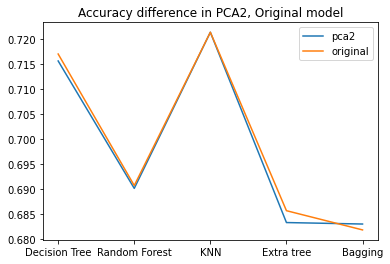

In [63]:
plt.plot(y_label,pca2,label='pca2')
plt.plot(y_label,ori,label='original')
plt.title('Accuracy difference in PCA2, Original model')
plt.legend()
plt.show()

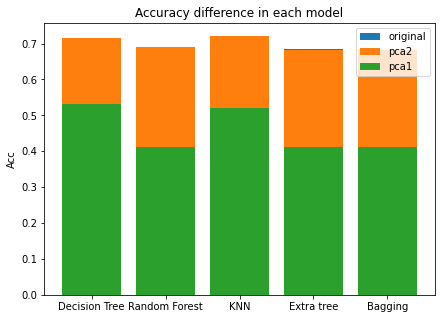

In [62]:
y_label = ['Decision Tree', 'Random Forest', 'KNN', 'Extra tree','Bagging']

plt.figure(figsize=(7,5))
plt.bar(y_label,ori,label='original')
plt.bar(y_label,pca2,label='pca2')
plt.bar(y_label,pca1,label='pca1')
plt.ylabel('Acc')
plt.title('Accuracy difference in each model')
plt.legend()
plt.show()